In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import sys
import os
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
!pwd

/Users/bhavi/Documents/Projects/CristianoRonaldo


In [4]:
df = pd.read_csv("/Users/bhavi/Documents/Projects/CristianoRonaldo/Cristano_Ronaldo_Final_v1/data.csv")

In [5]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [6]:
df = df.rename(columns={'distance_of_shot.1': 'distance_of_shot_1', \
                        'remaining_min.1':'remaining_min_1', \
                        'power_of_shot.1':'power_of_shot_1', \
                        'knockout_match.1' : 'knockout_match_1', \
                        'remaining_sec.1' : 'remaining_sec_1'})

df[df.match_id.isnull()].shape

(0, 28)

In [7]:
def fillKnockoutMatches(row):
    if row.name >= 26198:
        return 1
    else:
        return 0

df['knockout_match'] = df.apply(fillKnockoutMatches, axis=1)

In [8]:
df['distance_of_shot'] = df.apply(
    lambda row: row['distance_of_shot_1'] if np.isnanBhavi Chawla(row['distance_of_shot']) and (row['distance_of_shot_1']).is_integer() else row['distance_of_shot'],
    axis=1
)

SyntaxError: invalid syntax (<ipython-input-8-2a0a0c66077a>, line 2)

In [9]:
def findArea(x):
    if type(x) == float and np.isnan(x):
        return x
    else:
        return x.split('(')[1].split(')')[0]

df["area_of_shot"] = df["area_of_shot"].apply(findArea)

In [10]:
def processLowerRangeOfShot(row):
    range_of_shot = str(row['range_of_shot'])
    try:
        if "Less Than" in range_of_shot:
            return 0, 8
        elif "+" in range_of_shot:
            return 24, 32
        else:
            low = range_of_shot.split('-')[0]
            high = range_of_shot.split('-')[1][0:2]
            return low, high
    except Exception as e:
        return float('NaN'), float('NaN')
    
df['lower_range'], df['upper_range'] = zip(*df.apply(processLowerRangeOfShot, axis=1))

In [11]:
# data[data.location_x.isnull()].shape, data[data.location_y.isnull()].shape, data[data.distance_of_shot.isnull()].shape, data[data.range_of_shot.isnull()].shape

In [12]:
for col in df.columns:
    print (f"'{col}'", end=',')

'Unnamed: 0','match_event_id','location_x','location_y','remaining_min','power_of_shot','knockout_match','game_season','remaining_sec','distance_of_shot','is_goal','area_of_shot','shot_basics','range_of_shot','team_name','date_of_game','home/away','shot_id_number','lat/lng','type_of_shot','type_of_combined_shot','match_id','team_id','remaining_min_1','power_of_shot_1','knockout_match_1','remaining_sec_1','distance_of_shot_1','lower_range','upper_range',

In [13]:
def linearRegressionForLocation_X(data):    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()

    sub = data[data.location_x.notnull()]
    sub = sub[sub.location_y.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_y', 'distance_of_shot', 'lower_range', 'upper_range']]
    y_train = sub[['location_x']]

    sub = data[data.location_x.isnull()]
    sub = sub[sub.location_y.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_y', 'distance_of_shot', 'lower_range', 'upper_range']]

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    print (data[data.location_x.isnull()].shape, predicted.shape)

    print (predicted.mean(), data[data.location_x.notnull()]['location_x'].mean())

    data.loc[data.location_x.isnull() & \
             data.location_y.notnull() & \
            data.distance_of_shot.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'location_x'] = predicted 
    
    return data


In [14]:
print (df[df.location_x.isnull()].shape)
df = linearRegressionForLocation_X(df.copy())
print (df[df.location_x.isnull()].shape)
# df = df.drop(df[df.location_x.isnull()].index)
print (df[df.location_x.isnull()].shape)

(1461, 30)
(1461, 30) (1238, 1)
7.047634570963861 7.383876043234369
(223, 30)
(223, 30)


/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [15]:
def linearRegressionForLocation_Y(data):
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression()

    sub = data[data.location_y.notnull()]
    sub = sub[sub.location_x.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_train = sub[['location_x', 'distance_of_shot', 'lower_range', 'upper_range']]
    y_train = sub[['location_y']]

    print (X_train.shape, y_train.shape)

    sub = data[data.location_y.isnull()]
    sub = sub[sub.location_x.notnull()][sub.distance_of_shot.notnull()][sub.lower_range.notnull()][sub.upper_range.notnull()]
    X_test = sub[['location_x', 'distance_of_shot', 'lower_range', 'upper_range']]

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    print (data[data.location_y.isnull()].shape, predicted.shape)

    print (predicted.mean(), data[data.location_y.notnull()]['location_y'].mean())

    data.loc[data.location_y.isnull() & \
             data.location_x.notnull() & \
            data.distance_of_shot.notnull() & \
            data.lower_range.notnull() & \
            data.upper_range.notnull(), 'location_y'] = predicted 
    return data

    

In [16]:
df = linearRegressionForLocation_Y(df.copy())
print (df[df.location_y.isnull()].shape)
# df = df.drop(df[df.location_y.isnull()].index)
print (df[df.location_y.isnull()].shape)

(26216, 4) (26216, 1)
(1540, 30) (1294, 1)
91.08338651706153 91.12693349795933
(246, 30)
(246, 30)


/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [17]:
def linearRegressionForTimeRemaining(data):
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()

    sub = data[data.remaining_min.notnull()]
    sub = sub[sub.match_event_id.notnull()]
    X_train = sub[['match_event_id']]
    y_train = sub[['remaining_min']]

    print (X_train.shape, y_train.shape)

    sub = data[data.remaining_min.isnull()]
    sub = sub[sub.match_event_id.notnull()]
    X_test = sub[['match_event_id']]

    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    linreg.fit(X_train, y_train)

    predicted = linreg.predict(X_test)

    print (data[data.remaining_min.isnull()].shape, predicted.shape)

    print (predicted.mean(), data[data.remaining_min.notnull()]['remaining_min'].mean())

    data.loc[data.remaining_min.isnull() & data.match_event_id.notnull(), 'remaining_min'] = predicted 
    
    return data

In [18]:
df = linearRegressionForTimeRemaining(df.copy())
print (df[df.remaining_min.isnull()].shape)
# df = df.drop(df[df.remaining_min.isnull()].index)
print (df[df.remaining_min.isnull()].shape)

(27651, 1) (27651, 1)
(1562, 30) (1483, 1)
4.913381935144411 4.883233224643899
(79, 30)
(79, 30)


In [19]:
df['area_of_shot'].fillna(df['area_of_shot'].mode()[0], inplace=True)
df['area_of_shot'] = df['area_of_shot'].astype('category').cat.codes

df['shot_basics'].fillna(df['shot_basics'].mode()[0], inplace=True)
df['shot_basics'] = df['shot_basics'].astype('category').cat.codes

df['distance_of_shot'].fillna(df['distance_of_shot'].mean(), inplace=True)

df['lower_range'].fillna(df['lower_range'].mode()[0], inplace=True)
df['upper_range'].fillna(df['upper_range'].mode()[0], inplace=True)

df['type_of_shot'].fillna(df['type_of_shot'].mode()[0], inplace=True)
df['type_of_combined_shot'].fillna(df['type_of_combined_shot'].mode()[0], inplace=True)

df['type_of_shot'] = df['type_of_shot'].astype('category').cat.codes
df['type_of_combined_shot'] = df['type_of_combined_shot'].astype('category').cat.codes

df['location_x'].fillna(df['location_x'].mean(), inplace=True)
df['location_y'].fillna(df['location_y'].mean(), inplace=True)
df['remaining_min'].fillna(df['remaining_min'].mean(), inplace=True)
df['power_of_shot'].fillna(df['power_of_shot'].mode()[0], inplace=True)

In [20]:
for col in df.columns:
    print (f"'{col}'", end=',')

'Unnamed: 0','match_event_id','location_x','location_y','remaining_min','power_of_shot','knockout_match','game_season','remaining_sec','distance_of_shot','is_goal','area_of_shot','shot_basics','range_of_shot','team_name','date_of_game','home/away','shot_id_number','lat/lng','type_of_shot','type_of_combined_shot','match_id','team_id','remaining_min_1','power_of_shot_1','knockout_match_1','remaining_sec_1','distance_of_shot_1','lower_range','upper_range',

In [21]:
print (df[df.match_event_id.isnull()].shape,\
       df[df.location_x.isnull()].shape,\
       df[df.location_y.isnull()].shape,\
       df[df.remaining_min.isnull()].shape,\
       df[df.power_of_shot.isnull()].shape,\
       df[df.knockout_match.isnull()].shape,\
       df[df.distance_of_shot.isnull()].shape,\
       df[df.area_of_shot.isnull()].shape,\
       df[df.shot_basics.isnull()].shape,\
       df[df.lower_range.isnull()].shape,\
       df[df.upper_range.isnull()].shape,\
       df[df.type_of_shot.isnull()].shape,\
       df[df.type_of_combined_shot.isnull()].shape)

(1563, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30) (0, 30)


In [22]:
old_df = df.copy()

In [48]:
df = old_df.copy()

In [24]:

encoded = pd.get_dummies(data=df,columns = ['power_of_shot', 'area_of_shot', 'shot_basics', \
                                            'lower_range', 'upper_range', 'type_of_shot', \
                                            'type_of_combined_shot'])
encoded.columns = encoded.columns.str.replace(".", "_")

for col in encoded.columns:
    print (f"'{col}'", end=',')
df = encoded

'Unnamed: 0','match_event_id','location_x','location_y','remaining_min','knockout_match','game_season','remaining_sec','distance_of_shot','is_goal','range_of_shot','team_name','date_of_game','home/away','shot_id_number','lat/lng','match_id','team_id','remaining_min_1','power_of_shot_1','knockout_match_1','remaining_sec_1','distance_of_shot_1','power_of_shot_1_0','power_of_shot_2_0','power_of_shot_3_0','power_of_shot_4_0','power_of_shot_5_0','power_of_shot_6_0','power_of_shot_7_0','area_of_shot_0','area_of_shot_1','area_of_shot_2','area_of_shot_3','area_of_shot_4','area_of_shot_5','shot_basics_0','shot_basics_1','shot_basics_2','shot_basics_3','shot_basics_4','shot_basics_5','shot_basics_6','lower_range_0','lower_range_24','lower_range_16','lower_range_8','upper_range_8','upper_range_32','upper_range_16','upper_range_24','type_of_shot_0','type_of_shot_1','type_of_shot_2','type_of_shot_3','type_of_shot_4','type_of_shot_5','type_of_shot_6','type_of_shot_7','type_of_shot_8','type_of_shot_9

In [49]:
df.shape

(30697, 30)

In [50]:
submission = df[df.is_goal.isnull()]
submission = submission.copy()
submission.loc[:, 'shot_id_number'] = submission.index + 1

submission.to_csv("TestData.csv", index=False)
data = df[df.is_goal.notnull()]
df.shape, data.shape, submission.shape

((30697, 30), (24429, 30), (6268, 30))

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
x = data[['match_event_id','location_x','location_y',\
              'remaining_min','power_of_shot','knockout_match',\
              'remaining_sec','distance_of_shot',\
              'area_of_shot','shot_basics',\
              'shot_id_number',\
              'type_of_shot','type_of_combined_shot',\
              'match_id','team_id','remaining_min_1',\
              'power_of_shot_1','knockout_match_1',\
              'remaining_sec_1','distance_of_shot_1',\
              'lower_range','upper_range']].values

y = data[['is_goal']]

# feature extraction
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(x, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
# print (data[data.match_event_id.isnull()].shape,\
#        data[data.location_x.isnull()].shape,\
#        data[data.location_y.isnull()].shape,\
#        data[data.remaining_min.isnull()].shape,\
#        data[data.power_of_shot.isnull()].shape,\
#        data[data.knockout_match.isnull()].shape,\
#        data[data.distance_of_shot.isnull()].shape,\
#        data[data.area_of_shot.isnull()].shape,\
#        data[data.shot_basics.isnull()].shape,\
#        data[data.lower_range.isnull()].shape,\
#        data[data.upper_range.isnull()].shape,\
#        data[data.type_of_shot.isnull()].shape,\
#        data[data.type_of_combined_shot.isnull()].shape)

In [28]:
X_cols = ['location_x','location_y','remaining_min','knockout_match'\
          ,'distance_of_shot',\
          #,'home/away',\
          'power_of_shot_1_0','power_of_shot_2_0'\
          ,'power_of_shot_3_0','power_of_shot_4_0','power_of_shot_5_0'\
          ,'power_of_shot_6_0','power_of_shot_7_0','area_of_shot_0','area_of_shot_1'\
          ,'area_of_shot_2','area_of_shot_3','area_of_shot_4','area_of_shot_5','shot_basics_0'\
          ,'shot_basics_1','shot_basics_2','shot_basics_3','shot_basics_4','shot_basics_5'\
          ,'shot_basics_6','lower_range_0','lower_range_24','lower_range_16','lower_range_8'\
          ,'upper_range_8','upper_range_32','upper_range_16','upper_range_24','type_of_shot_0'\
          ,'type_of_shot_1','type_of_shot_2','type_of_shot_3','type_of_shot_4','type_of_shot_5'\
          ,'type_of_shot_6','type_of_shot_7','type_of_shot_8','type_of_shot_9','type_of_shot_10'\
          ,'type_of_shot_11','type_of_shot_12','type_of_shot_13','type_of_shot_14'\
          ,'type_of_shot_15','type_of_shot_16','type_of_shot_17','type_of_shot_18'\
          ,'type_of_shot_19','type_of_shot_20','type_of_shot_21','type_of_shot_22'\
          ,'type_of_shot_23','type_of_shot_24','type_of_shot_25','type_of_shot_26'\
          ,'type_of_shot_27','type_of_shot_28','type_of_shot_29','type_of_shot_30'\
          ,'type_of_shot_31','type_of_shot_32','type_of_shot_33','type_of_shot_34'\
          ,'type_of_shot_35','type_of_shot_36','type_of_shot_37','type_of_shot_38'\
          ,'type_of_shot_39','type_of_shot_40','type_of_shot_41','type_of_shot_42'\
          ,'type_of_shot_43','type_of_shot_44','type_of_shot_45','type_of_shot_46'\
          ,'type_of_shot_47','type_of_shot_48','type_of_shot_49','type_of_shot_50'\
          ,'type_of_shot_51','type_of_shot_52','type_of_shot_53','type_of_shot_54'\
          ,'type_of_shot_55','type_of_shot_56','type_of_combined_shot_0','type_of_combined_shot_1'\
          ,'type_of_combined_shot_2','type_of_combined_shot_3','type_of_combined_shot_4','type_of_combined_shot_5']

In [29]:
def plotPrecisionRecallCurve(y_test, y_pred, average_precision):
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from inspect import signature

    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [30]:
def plotROCCurve(y_test, y_pred, model):
    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [31]:
def evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier):
    # Making the Confusion Matrix
    cm_test = confusion_matrix(y_test, y_pred)
    cm_train = confusion_matrix(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    average_precision = average_precision_score(y_test, y_pred)
    print (f"{cm_test} \n {accuracy_test} \n\n {cm_train} \n {accuracy_train} \n\nPrecision Recall Score = {average_precision} ")
    print (f"\n\nClassification Report\n {classification_report(y_test, y_pred)}\n")
    plotROCCurve(y_test, y_pred, classifier)
#     plotPrecisionRecallCurve(y_test, y_pred, average_precision)

    

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1050  319]
 [ 604  470]] 
 0.6221858370855505 

 [[9470 2711]
 [5566 4239]] 
 0.6235331574638406 

Precision Recall Score = 0.5079210366984654 


Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.77      0.69      1369
         1.0       0.60      0.44      0.50      1074

    accuracy                           0.62      2443
   macro avg       0.62      0.60      0.60      2443
weighted avg       0.62      0.62      0.61      2443




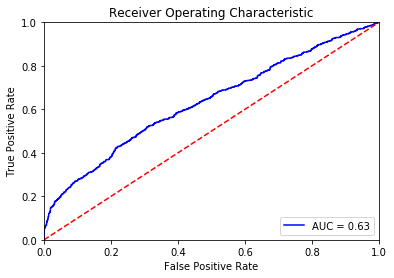

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1175  194]
 [ 690  384]] 
 0.6381498158002455 

 [[10623  1558]
 [ 6278  3527]] 
 0.6435913763303921 

Precision Recall Score = 0.5199761102399165 


Classification Report
               precision    recall  f1-score   support

         0.0       0.63      0.86      0.73      1369
         1.0       0.66      0.36      0.46      1074

    accuracy                           0.64      2443
   macro avg       0.65      0.61      0.60      2443
weighted avg       0.65      0.64      0.61      2443




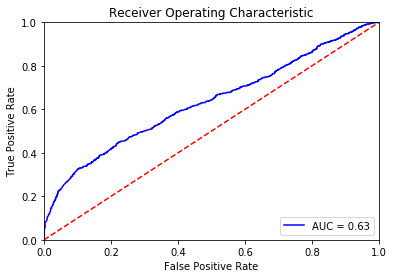

/Users/bhavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[1009  360]
 [ 620  454]] 
 0.5988538681948424 

 [[11658   523]
 [  755  9050]] 
 0.9418721004275448 

Precision Recall Score = 0.4895533294150253 


Classification Report
               precision    recall  f1-score   support

         0.0       0.62      0.74      0.67      1369
         1.0       0.56      0.42      0.48      1074

    accuracy                           0.60      2443
   macro avg       0.59      0.58      0.58      2443
weighted avg       0.59      0.60      0.59      2443




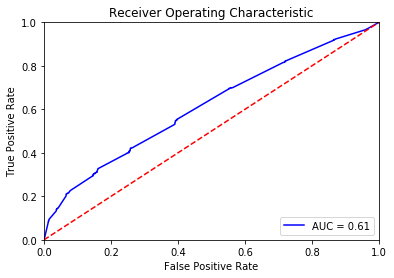

In [46]:
X = data[X_cols].values
y = data[['is_goal']].values

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(), [5, 6, 7, 8, 10, 11])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
#     remainder='passthrough'                         # Leave the rest of the columns untouched
# )

# X = np.array(ct.fit_transform(X), dtype=np.float)


from sklearn.utils import shuffle
X, y = shuffle(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # from 10 observations- 2 in test set and 8 in training set, random state is not necessary

''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)
# debate on scaling dummy variablesm

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)
y_pred_train = logistic.predict(X_train)

# Predicting the Test set results
y_pred = logistic.predict(X_test)

evaluatePredictions(y_test, y_pred, y_train, y_pred_train, logistic)

from xgboost import XGBClassifier
xboost_classifier = XGBClassifier()
xboost_classifier.fit(X_train, y_train)

y_pred_train = xboost_classifier.predict(X_train)
y_pred = xboost_classifier.predict(X_test)

evaluatePredictions(y_test, y_pred, y_train, y_pred_train, xboost_classifier)
probs = xboost_classifier.predict_proba(X_test)


# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

# y_pred_train = classifier.predict(X_train)
# y_pred = classifier.predict(X_test)

# evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier)


# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

# y_pred_train = classifier.predict(X_train)
# y_pred = classifier.predict(X_test)

# evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier)

In [34]:
X = submission[X_cols].values
# y = submission[['is_goal']].values
submission.shape

# print (X.shape)

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(), [5, 6, 7, 8, 10, 11])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
#     remainder='passthrough'                         # Leave the rest of the columns untouched
# )

# X = np.array(ct.fit_transform(X), dtype=np.float)

# print(X.shape)

# from sklearn.utils import shuffle
# X, y = shuffle(X, y)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # from 10 observations- 2 in test set and 8 in training set, random state is not necessary

# ''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =sc_X.fit_transform(X)

probs = xboost_classifier.predict_proba(X)

In [38]:
solution = pd.DataFrame(columns=['shot_id_number', 'is_goal'])

solution['shot_id_number'] = submission['shot_id_number']
solution['is_goal'] = probs

In [43]:
solution.to_csv("bhavi_chawla_280998_code_1.csv",index=False)

In [67]:
from sklearn.model_selection import cross_validate
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import learning_curve, GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# train = pd.read_csv('train_modified.csv')
# target = 'Disbursed'
# IDcol = 'ID'

train = data[X_cols].values
target = data[['is_goal']].values


def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

#Choose all predictors except targe
predictors = [x for x in train.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)




KeyError: "['power_of_shot_1_0' 'power_of_shot_2_0' 'power_of_shot_3_0'\n 'power_of_shot_4_0' 'power_of_shot_5_0' 'power_of_shot_6_0'\n 'power_of_shot_7_0' 'area_of_shot_0' 'area_of_shot_1' 'area_of_shot_2'\n 'area_of_shot_3' 'area_of_shot_4' 'area_of_shot_5' 'shot_basics_0'\n 'shot_basics_1' 'shot_basics_2' 'shot_basics_3' 'shot_basics_4'\n 'shot_basics_5' 'shot_basics_6' 'lower_range_0' 'lower_range_24'\n 'lower_range_16' 'lower_range_8' 'upper_range_8' 'upper_range_32'\n 'upper_range_16' 'upper_range_24' 'type_of_shot_0' 'type_of_shot_1'\n 'type_of_shot_2' 'type_of_shot_3' 'type_of_shot_4' 'type_of_shot_5'\n 'type_of_shot_6' 'type_of_shot_7' 'type_of_shot_8' 'type_of_shot_9'\n 'type_of_shot_10' 'type_of_shot_11' 'type_of_shot_12' 'type_of_shot_13'\n 'type_of_shot_14' 'type_of_shot_15' 'type_of_shot_16' 'type_of_shot_17'\n 'type_of_shot_18' 'type_of_shot_19' 'type_of_shot_20' 'type_of_shot_21'\n 'type_of_shot_22' 'type_of_shot_23' 'type_of_shot_24' 'type_of_shot_25'\n 'type_of_shot_26' 'type_of_shot_27' 'type_of_shot_28' 'type_of_shot_29'\n 'type_of_shot_30' 'type_of_shot_31' 'type_of_shot_32' 'type_of_shot_33'\n 'type_of_shot_34' 'type_of_shot_35' 'type_of_shot_36' 'type_of_shot_37'\n 'type_of_shot_38' 'type_of_shot_39' 'type_of_shot_40' 'type_of_shot_41'\n 'type_of_shot_42' 'type_of_shot_43' 'type_of_shot_44' 'type_of_shot_45'\n 'type_of_shot_46' 'type_of_shot_47' 'type_of_shot_48' 'type_of_shot_49'\n 'type_of_shot_50' 'type_of_shot_51' 'type_of_shot_52' 'type_of_shot_53'\n 'type_of_shot_54' 'type_of_shot_55' 'type_of_shot_56'\n 'type_of_combined_shot_0' 'type_of_combined_shot_1'\n 'type_of_combined_shot_2' 'type_of_combined_shot_3'\n 'type_of_combined_shot_4' 'type_of_combined_shot_5'] not in index"

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [5, 6, 7, 8, 10, 11])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X = np.array(ct.fit_transform(X), dtype=np.float)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [46]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [47]:
X.shape

(6268, 39)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # from 10 observations- 2 in test set and 8 in training set, random state is not necessary

In [35]:
X_train.shape, y_train.sum(), y_train.sum()/X_train.shape[0]
# y_test.value_counts(normalize=True)

((21986, 40), 9784.0, 0.4450104612025835)

In [36]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=12, ratio = 1.0)
# x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# X_train, y_train = x_train_res, y_train_res

In [37]:
X_train.shape, y_train.sum(), y_train.sum()/X_train.shape[0]
# y_test.value_counts(normalize=True)

((21986, 40), 9784.0, 0.4450104612025835)

In [38]:
''' Feature Scaling '''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)
# debate on scaling dummy variablesm

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1153  195]
 [ 768  327]] 
 0.6058125255832992 

 [[10274  1928]
 [ 6635  3149]] 
 0.6105248794687529 

Precision Recall Score = 0.5014404827484373 


Classification Report
               precision    recall  f1-score   support

         0.0       0.60      0.86      0.71      1348
         1.0       0.63      0.30      0.40      1095

    accuracy                           0.61      2443
   macro avg       0.61      0.58      0.55      2443
weighted avg       0.61      0.61      0.57      2443




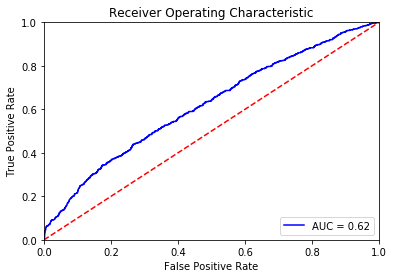

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier)

/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1149  199]
 [ 725  370]] 
 0.6217765042979942 

 [[10293  1909]
 [ 6131  3653]] 
 0.6343127444737561 

Precision Recall Score = 0.5164900513829245 


Classification Report
               precision    recall  f1-score   support

         0.0       0.61      0.85      0.71      1348
         1.0       0.65      0.34      0.44      1095

    accuracy                           0.62      2443
   macro avg       0.63      0.60      0.58      2443
weighted avg       0.63      0.62      0.59      2443




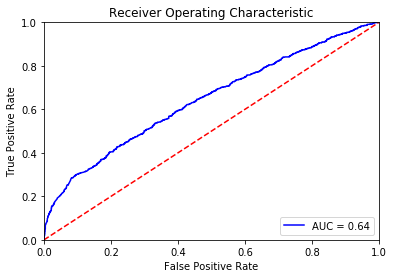

In [43]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

evaluatePredictions(y_test, y_pred, y_train, y_pred_train, classifier)
probs = classifier.predict_proba(X_test)

In [ ]:
#Submission

